In [1]:
import numpy
import sys

def ITEMWISE_METRICS(observed, observed_ratings, predicted_ratings,y,w):
    delta = numpy.ma.subtract(predicted_ratings,observed_ratings)
#     rectifiedDelta = numpy.square(delta)
    rectifiedDelta = numpy.ma.abs(delta)
    print("rectifiedDelta")
    print(rectifiedDelta)
    
    numUsers,numItems = numpy.shape(observed_ratings)
    scale = numUsers * numItems
    
    #e^_{u,i} = w(r^_{u,i}-y)^2
#     imputed_error = (numpy.square(numpy.ma.subtract(predicted_ratings,y))) * w 
    imputed_error = (numpy.ma.abs(numpy.ma.subtract(predicted_ratings,y))) * w 
    print("imputed_error")
    print(imputed_error)
    
    #OE1 = o_{u,i}e_{u,i}
    observedError1 = numpy.ma.multiply(observed,rectifiedDelta)
    print("observedError1")
    print(observedError1)
    
    #OE2 = (1-o{u,i})*e^_{u,i}
    unobserved = numpy.ma.subtract(numpy.ones((numUsers,numItems)),observed)
    observedError2 = numpy.ma.multiply(unobserved,imputed_error)
    print("observedError2")
    print(observedError2)
    
    
    totalObservedError = observedError1 + observedError2
    cumulativeError = numpy.ma.sum(totalObservedError,dtype = numpy.longdouble)
    print("cumulativeError")
    print(cumulativeError)
    
    vanillaMetric = cumulativeError / scale
    print("vanillaMetric")
    print(vanillaMetric)
    
    return vanillaMetric

In [2]:
if __name__ == "__main__":
    shape = (2,3)
    true_ratings = [[1,1,5],
                    [1,1,5]]
    
    predicted_ratings = [[3,3,4],
                        [3,3,4]]
    a = numpy.ma.array(true_ratings)
    b = numpy.ma.array(predicted_ratings)
    
   
    print ("[MAIN]\t True ratings:")
    print (a)
    print ("[MAIN]\t Predicted ratings:")
    print (b)
    
    observed = [[1,0,0],
                [0,0,1]]
            
    
    
    y = 4.5
    w = 1
    #observerd_ratings 这里不太确定
    
   
    observed_ratings = numpy.ma.array(a, dtype = numpy.longdouble, copy = True, 
                             fill_value = 0, hard_mask = True)
    print("[MAIN]\t observed_ratings")
    print(observed_ratings)
    ITEMWISE_METRICS(observed, observed_ratings,b,y,w)

[MAIN]	 True ratings:
[[1 1 5]
 [1 1 5]]
[MAIN]	 Predicted ratings:
[[3 3 4]
 [3 3 4]]
[MAIN]	 observed_ratings
[[1. 1. 5.]
 [1. 1. 5.]]
rectifiedDelta
[[2. 2. 1.]
 [2. 2. 1.]]
imputed_error
[[1.5 1.5 0.5]
 [1.5 1.5 0.5]]
observedError1
[[2. 0. 0.]
 [0. 0. 1.]]
observedError2
[[0.  1.5 0.5]
 [1.5 1.5 0. ]]
cumulativeError
8.0
vanillaMetric
1.3333333333333333


iter_count:  0 the loss: 3235.984565071099
iter_count:  1 the loss: 2562.894159414428
iter_count:  2 the loss: 1678.584262863892
iter_count:  3 the loss: 1153.0242449798698
iter_count:  4 the loss: 916.0858231268927
iter_count:  5 the loss: 543.0914238395673
iter_count:  6 the loss: 158.44189772001957
iter_count:  7 the loss: 76.82068504553726
iter_count:  8 the loss: 56.09244220314393
iter_count:  9 the loss: 26.20003143907467
iter_count:  10 the loss: 23.599630216328233
iter_count:  11 the loss: 18.533945803591582
iter_count:  12 the loss: 13.2475645605793
iter_count:  13 the loss: 4.880527898442126
iter_count:  14 the loss: 4.630994397317365
iter_count:  15 the loss: 3.8693581550178813
iter_count:  16 the loss: 4.101672268623849
iter_count:  17 the loss: 2.692478984360694
iter_count:  18 the loss: 2.428447330494128
iter_count:  19 the loss: 1.7818398672079119
iter_count:  20 the loss: 0.7792329375773179
iter_count:  21 the loss: 0.8686171553351739
iter_count:  22 the loss: 0.9744116

iter_count:  198 the loss: 0.2937110490520243
iter_count:  199 the loss: 0.3067522967744063
iter_count:  200 the loss: 0.2900024259354593
iter_count:  201 the loss: 0.2880599152147708
iter_count:  202 the loss: 0.2979225785680851
iter_count:  203 the loss: 0.30496371740270306
iter_count:  204 the loss: 0.32867030876021675
iter_count:  205 the loss: 0.2789622493729073
iter_count:  206 the loss: 0.2788959490636591
iter_count:  207 the loss: 0.28437224751049983
iter_count:  208 the loss: 0.29497537077916663
iter_count:  209 the loss: 0.2803229361359835
iter_count:  210 the loss: 0.27276819784513745
iter_count:  211 the loss: 0.28980161016665107
iter_count:  212 the loss: 0.2925316356517209
iter_count:  213 the loss: 0.2734354374811556
iter_count:  214 the loss: 0.2709526572276468
iter_count:  215 the loss: 0.2710076276902568
iter_count:  216 the loss: 0.281339414460683
iter_count:  217 the loss: 0.30274841943657954
iter_count:  218 the loss: 0.3315749737288527
iter_count:  219 the loss: 0

iter_count:  392 the loss: 0.13099490659878682
iter_count:  393 the loss: 0.15145771155781432
iter_count:  394 the loss: 0.15932904369712864
iter_count:  395 the loss: 0.14923934776412753
iter_count:  396 the loss: 0.13669343344912463
iter_count:  397 the loss: 0.1284508437166585
iter_count:  398 the loss: 0.12713742627792837
iter_count:  399 the loss: 0.12716294969004877
iter_count:  400 the loss: 0.1322605351109627
iter_count:  401 the loss: 0.12730640382412184
iter_count:  402 the loss: 0.1252529804713902
iter_count:  403 the loss: 0.12755038048236594
iter_count:  404 the loss: 0.12743321038660343
iter_count:  405 the loss: 0.12386153633818799
iter_count:  406 the loss: 0.1378014522251428
iter_count:  407 the loss: 0.12616091437989016
iter_count:  408 the loss: 0.12085039395999479
iter_count:  409 the loss: 0.12150961730220618
iter_count:  410 the loss: 0.12719382572969895
iter_count:  411 the loss: 0.12560827377069333
iter_count:  412 the loss: 0.1187948998047668
iter_count:  413 t

iter_count:  579 the loss: 0.06706469766266393
iter_count:  580 the loss: 0.06247315475435245
iter_count:  581 the loss: 0.06572639536154967
iter_count:  582 the loss: 0.06270181444393812
iter_count:  583 the loss: 0.061327266571031144
iter_count:  584 the loss: 0.06134540480437066
iter_count:  585 the loss: 0.06185809683802869
iter_count:  586 the loss: 0.06345372064033102
iter_count:  587 the loss: 0.060514526820006596
iter_count:  588 the loss: 0.06039826095274102
iter_count:  589 the loss: 0.06325671044838259
iter_count:  590 the loss: 0.06790011498639381
iter_count:  591 the loss: 0.06680452536723304
iter_count:  592 the loss: 0.06416883503073353
iter_count:  593 the loss: 0.06251621409451312
iter_count:  594 the loss: 0.05852003404122088
iter_count:  595 the loss: 0.0580837963739005
iter_count:  596 the loss: 0.05943503224739067
iter_count:  597 the loss: 0.05787013289657196
iter_count:  598 the loss: 0.05835572389562852
iter_count:  599 the loss: 0.06121479303576106
iter_count: 

iter_count:  769 the loss: 0.031040300900905947
iter_count:  770 the loss: 0.03214200909611793
iter_count:  771 the loss: 0.03372169932571771
iter_count:  772 the loss: 0.03075383109645413
iter_count:  773 the loss: 0.03169827493813166
iter_count:  774 the loss: 0.034031553590669714
iter_count:  775 the loss: 0.030716309198814174
iter_count:  776 the loss: 0.03172250183685507
iter_count:  777 the loss: 0.033228464139310056
iter_count:  778 the loss: 0.031622595026960194
iter_count:  779 the loss: 0.02971424682205079
iter_count:  780 the loss: 0.031864143830433275
iter_count:  781 the loss: 0.03427333621593245
iter_count:  782 the loss: 0.032824274651881424
iter_count:  783 the loss: 0.03229532538128533
iter_count:  784 the loss: 0.02968132087405119
iter_count:  785 the loss: 0.029167982887349536
iter_count:  786 the loss: 0.029336690789679442
iter_count:  787 the loss: 0.029008318552842607
iter_count:  788 the loss: 0.02955221777280096
iter_count:  789 the loss: 0.03129721852485403
ite

iter_count:  961 the loss: 0.014586473464901517
iter_count:  962 the loss: 0.013818789614412127
iter_count:  963 the loss: 0.013898457528533494
iter_count:  964 the loss: 0.013884022726765586
iter_count:  965 the loss: 0.013913069510700246
iter_count:  966 the loss: 0.014191464342076935
iter_count:  967 the loss: 0.01504187861506963
iter_count:  968 the loss: 0.016420778370013135
iter_count:  969 the loss: 0.013954266857117805
iter_count:  970 the loss: 0.013713039719241187
iter_count:  971 the loss: 0.014356680918541335
iter_count:  972 the loss: 0.014666533021705374
iter_count:  973 the loss: 0.015092245172100555
iter_count:  974 the loss: 0.014369701219964177
iter_count:  975 the loss: 0.015590229644273456
iter_count:  976 the loss: 0.013319465036985213
iter_count:  977 the loss: 0.01332902852819375
iter_count:  978 the loss: 0.013454617180863038
iter_count:  979 the loss: 0.013125534869102434
iter_count:  980 the loss: 0.014345643525980315
iter_count:  981 the loss: 0.0143121103099

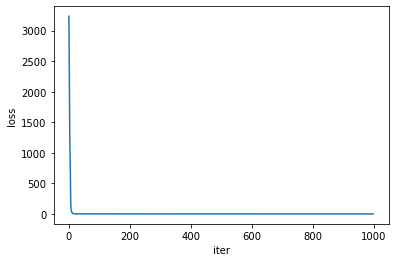

[4.86825768 7.0795228 ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

def get_data(sample_num=1000):
    x1 = np.linspace(0, 9, sample_num)
    x2 = np.linspace(4, 13, sample_num)
    x = np.concatenate(([x1], [x2]), axis=0).T
    y = np.dot(x, np.array([5, 7]).T) ## 拟合函数，示例是 y = 5*x1 + 7*x2
    return x, y

def SGD(samples, y, step_size=2, max_iter_count=1000):
    
    """
    :param samples: 样本
    :param y: 结果value
    :param step_size: 每一接迭代的步长
    :param max_iter_count: 最大的迭代次数
    :param batch_size: 随机选取的相对于总样本的大小
    :return:
    """
    m, var = samples.shape
    theta = np.zeros(2)
    y = y.flatten()
    loss = 1
    iter_count = 0
    iter_list=[]
    loss_list=[]
    theta1=[]
    theta2=[]
    
    while loss > 0.01 and iter_count < max_iter_count:
        loss = 0
        theta1.append(theta[0])
        theta2.append(theta[1])
        rand1 = np.random.randint(0,m,1)
        h = np.dot(theta,samples[rand1].T)
        
        for i in range(len(theta)):
            theta[i] =theta[i] - step_size*(1/m)*(h - y[rand1])*samples[rand1,i]
        for i in range(m):
            h = np.dot(theta.T, samples[i])
            every_loss = (1/(var*m))*np.power((h - y[i]), 2)
            loss = loss + every_loss
            
        print("iter_count: ", iter_count, "the loss:", loss)
        
        iter_list.append(iter_count)
        loss_list.append(loss)
        
        iter_count += 1

    plt.plot(iter_list,loss_list)
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.show()
    return theta1,theta2,theta,loss_list

if __name__ == '__main__':
    samples, y = get_data()
    theta1,theta2,theta,loss_list = SGD(samples, y)
    print(theta)